In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import pandas as pd
from matplotlib import cm
from IPython.display import display, HTML
import operator as op

In [3]:
data_dir = '../data/'


In [4]:
df_nips = pd.read_csv(data_dir + 'nips_2016-2020.csv')
df_icml = pd.read_csv(data_dir + 'icml_affiliations.csv')

df_iclr1 = pd.read_csv(data_dir + 'ICLR-2017-18-19-21.csv')
df_iclr2 = pd.read_csv(data_dir + '2020_iclr_manual_data.csv')
df_iclr = pd.concat([df_iclr1, df_iclr2], sort=True)
df_iclr = df_iclr.reset_index(drop=True)
df_cvpr = pd.read_csv(data_dir + 'cvpr_16-21.csv')

df_cvpr_citations = pd.read_csv(data_dir + 'cvpr_citations.csv')

In [5]:
df_cvpr['Authors']
for i in range(len(df_cvpr['Authors'])): 
    df_cvpr['Authors'] = df_cvpr['Authors'].str.replace(';',',')
    
for i in range(len(df_iclr['Citations'])):
    try:
        df_iclr['Citations'][i] = int(df_iclr['Citations'][i])
        df_iclr['YEAR'][i] = int(df_iclr['YEAR'][i])
    except Exception as e: 
        df_iclr['Citations'][i] = 0
        df_iclr['YEAR'][i] = df_iclr['YEAR'][i-1]

<ipython-input-5-dd3570a6c6d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iclr['Citations'][i] = int(df_iclr['Citations'][i])
<ipython-input-5-dd3570a6c6d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iclr['YEAR'][i] = int(df_iclr['YEAR'][i])
<ipython-input-5-dd3570a6c6d7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iclr['Citations'][i] = 0
<ipython-input-5-dd3570a6c6d7>:11: SettingWithCopyWarning: 
A value is

In [6]:
years = df_nips['YEAR'].unique()
years

array([2016, 2017, 2018, 2019, 2020, 2021])

In [7]:
paper_per_year = {'NIPS': dict(),'ICML':dict(),'ICLR':dict(),'CVPR': dict()}
data = [df_nips, df_icml, df_iclr, df_cvpr]
num = 0
for key in paper_per_year.keys():
    print(key)
    pub_per_year = dict()

    for i in years: 
        pub_per_year.update({i:0})

    for i in range(len(data[num])):
        try:
            pub_per_year[data[num]['YEAR'][i]] +=1
        except:
            continue
    paper_per_year[key] = pub_per_year
    num+=1

NIPS
ICML
ICLR
CVPR


In [8]:
paper_per_year['CVPR']

{2016: 643, 2017: 784, 2018: 1004, 2019: 1302, 2020: 1469, 2021: 1667}

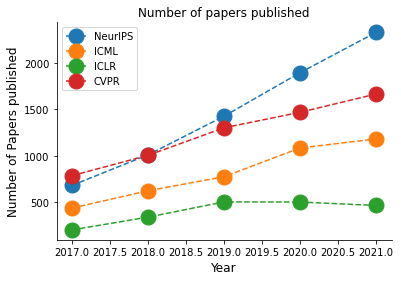

In [9]:
fig,axs = subplots(1,1) 
axs.plot(years[1:], list(paper_per_year['NIPS'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'NeurIPS')
axs.plot(years[1:], list(paper_per_year['ICML'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'ICML')
axs.plot(years[1:], list(paper_per_year['ICLR'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'ICLR')
axs.plot(years[1:], list(paper_per_year['CVPR'].values())[1:],marker = 'o', linestyle='--', markersize = 15, label = 'CVPR')
axs.set_xlabel('Year', fontsize = 12)
axs.set_ylabel('Number of Papers published',fontsize = 12)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('Number of papers published')
axs.legend()

In [10]:
df_nips_citations = pd.read_csv(data_dir + 'nips_citations.csv')
df_icml_citations = pd.read_csv(data_dir + 'icml_citations.csv')
df_iclr_citations = pd.DataFrame({'YEAR':df_iclr['YEAR'], 'citations':df_iclr['Citations']})
df_iclr_citations['citations'].astype('int64').dtypes
type(df_iclr_citations['citations'][1994])

int

In [11]:
nips_2017 = df_nips_citations[df_nips_citations['YEAR']==2017].sort_values(by='citations', ascending = False)
nips_2018 = df_nips_citations[df_nips_citations['YEAR']==2018].sort_values(by='citations', ascending = False)
nips_2019 = df_nips_citations[df_nips_citations['YEAR']==2019].sort_values(by='citations', ascending = False)
print('Neurips {}'.format(2017))
display(HTML(nips_2017[['TITLE', 'citations']].head(n=10).to_html(index=False)))
# print('Neurips {}'.format(2018))
# display(HTML(nips_2018[['TITLE', 'citations']].head(n=10).to_html(index=False)))
# print('Neurips {}'.format(2019))
# display(HTML(nips_2019[['TITLE', 'citations']].head(n=10).to_html(index=False)))

Neurips 2017


TITLE,citations
Attention is All you Need,31339
Improved Training of Wasserstein GANs,5834
GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium,3971
Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles,2058
Unsupervised Image-to-Image Translation Networks,1882
Self-Normalizing Neural Networks,1733
Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments,1663
Hindsight Experience Replay,1258
A simple neural network module for relational reasoning,1201
Deep Sets,1189


In [12]:
bins = [0,50,500,5000,50000,500000]

nips_citations_2017 = df_nips_citations[df_nips_citations['YEAR']==2017]['citations']
nips_citations_2018 = df_nips_citations[df_nips_citations['YEAR']==2018]['citations']
nips_citations_2019 = df_nips_citations[df_nips_citations['YEAR']==2019]['citations']
nips_citations_2020 = df_nips_citations[df_nips_citations['YEAR']==2020]['citations']

icml_citations_2017 = df_icml_citations[df_icml_citations['YEAR']==2017]['citations']
icml_citations_2018 = df_icml_citations[df_icml_citations['YEAR']==2018]['citations']
icml_citations_2019 = df_icml_citations[df_icml_citations['YEAR']==2019]['citations']
icml_citations_2020 = df_icml_citations[df_icml_citations['YEAR']==2020]['citations']

iclr_citations_2017 = df_iclr_citations[df_iclr_citations['YEAR']==2017]['citations']
iclr_citations_2018 = df_iclr_citations[df_iclr_citations['YEAR']==2018]['citations']
iclr_citations_2019 = df_iclr_citations[df_iclr_citations['YEAR']==2019]['citations']
iclr_citations_2020 = df_iclr_citations[df_iclr_citations['YEAR']==2020]['citations']

cvpr_citations_2017 = df_cvpr_citations[df_cvpr_citations['YEAR']==2017]['citations']
cvpr_citations_2018 = df_cvpr_citations[df_cvpr_citations['YEAR']==2018]['citations']
cvpr_citations_2019 = df_cvpr_citations[df_cvpr_citations['YEAR']==2019]['citations']
cvpr_citations_2020 = df_cvpr_citations[df_cvpr_citations['YEAR']==2020]['citations']




nips_citations = {2017:np.histogram(nips_citations_2017, bins), 2018:np.histogram(nips_citations_2018,bins),\
                  2019:np.histogram(nips_citations_2019,bins), 2020:np.histogram(nips_citations_2020,bins)}

icml_citations = {2017:np.histogram(icml_citations_2017,bins), 2018:np.histogram(icml_citations_2018,bins),\
                  2019:np.histogram(icml_citations_2019,bins), 2020:np.histogram(icml_citations_2020,bins)}

iclr_citations = {2017:np.histogram(iclr_citations_2017, bins), 2018:np.histogram(iclr_citations_2018, bins),\
                  2019:np.histogram(iclr_citations_2019, bins), 2020: np.histogram(iclr_citations_2020, bins)}

cvpr_citations = {2017:np.histogram(cvpr_citations_2017, bins),2018:np.histogram(cvpr_citations_2018, bins),\
                 2019:np.histogram(cvpr_citations_2019, bins),2020:np.histogram(cvpr_citations_2020, bins)}


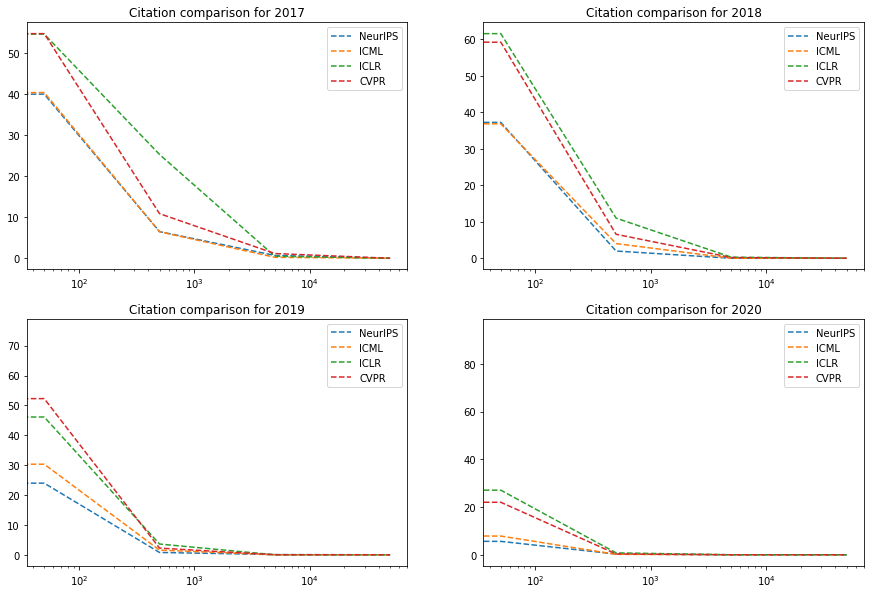

In [13]:
years = list(nips_citations.keys())
fig,axs = subplots(2,2,figsize = (15,10))
for i in range(len(years)):
    axs[i//2, i%2].plot(list(nips_citations[years[i]][1][:-1]), list(100*nips_citations[years[i]][0])/sum(list(nips_citations[years[i]][0])),label='NeurIPS', linestyle = '--')
    axs[i//2,i%2].plot(list(icml_citations[years[i]][1][:-1]), list(100*icml_citations[years[i]][0])/sum(list(icml_citations[years[i]][0])),label='ICML', linestyle = '--')
    axs[i//2,i%2].plot(list(iclr_citations[years[i]][1][:-1]), list(100*iclr_citations[years[i]][0])/sum(list(iclr_citations[years[i]][0])), label='ICLR',linestyle = '--')
    axs[i//2,i%2].plot(list(cvpr_citations[years[i]][1][:-1]), list(100*cvpr_citations[years[i]][0])/sum(list(cvpr_citations[years[i]][0])), label='CVPR',linestyle = '--')
    axs[i//2,i%2].set_title(f'Citation comparison for {years[i]}')
    axs[i//2,i%2].set_xscale('log')
    axs[i//2,i%2].legend()

In [14]:
# df_whole = pd.concat([df_nips, df_iclr, df_icml, df_cvpr])
df_whole = pd.concat([df_nips, df_icml,df_iclr,df_cvpr])

In [22]:
df_whole

,YEAR,TITLE,Authors,Paper Link,ABSTRACT,Affiliations,Citations,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 0,Abstract
0,2016.0,Improved Dropout for Shallow and Deep Learning,"Zhe Li, Boqing Gong, Tianbao Yang",https://nips.cc/Conferences/2016/Schedule?show...,Dropout has been witnessed with great success ...,"['The University of Iowa', 'University of Cent...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.0,Communication-Optimal Distributed Clustering,"Jiecao Chen, He Sun, David Woodruff, Qin Zhang",https://nips.cc/Conferences/2016/Schedule?show...,Clustering large datasets is a fundamental pro...,"['Indiana University Bloomington', 'The Univer...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.0,On Robustness of Kernel Clustering,"Bowei Yan, Purnamrita Sarkar",https://nips.cc/Conferences/2016/Schedule?show...,Clustering is an important unsupervised learni...,"['University of Texas at Austin', 'U.C. Berkel...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.0,Combinatorial semi-bandit with known covariance,"Rémy Degenne, Vianney Perchet",https://nips.cc/Conferences/2016/Schedule?show...,The combinatorial stochastic semi-bandit probl...,"['Université Paris Diderot', 'Ensae - Criteo L...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.0,A posteriori error bounds for joint matrix dec...,"Nicolò Colombo, Nikos Vlassis",https://nips.cc/Conferences/2016/Schedule?show...,Joint matrix triangularization is often used f...,"['University College London', 'Adobe Research']",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,2021.0,Image Compression with Recurrent Neural Networ...,"K. Islam, L. M. Dang, S. Lee, H. Moon",NaN,NaN,['Sejong University Computer Vision and Patter...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1674.0,Image compression is a method to remove spatia...
6912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.0,NaN
6913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1676.0,NaN
6914,2021.0,NTIRE 2021 Multi-modal Aerial View Object Clas...,"J. Liu, N. Inkawhich, O. Nina, R. Timofte, Y. ...",NaN,NaN,"['NTIRE 2021 challenge organizers', 'NTIRE 202...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1677.0,"In this paper, we introduce the first Challeng..."


In [15]:
affiliations = np.asarray(df_whole['Affiliations'])
aff_dict = dict()

for i in range(len(affiliations)):
    
    aff = str(affiliations[i]).replace('[','').replace(']','').replace('The','').split(', ')
    for entry in aff:
        entry = entry.replace("'",'')
        if entry not in aff_dict.keys():
            aff_dict.update({entry:1})
        else:
            aff_dict[entry] +=1
   
            
affil = dict(sorted(aff_dict.items(), key = op.itemgetter(1))[::-1])

def remove_duplicates(target_key, words):
    assert target_key in list(affil.keys())
    assert isinstance(words, list) and len(words) >= 1
    for key in list(affil.keys()): 
        if any(word in key.lower() for word in words)  : 
            affil[target_key] += affil[key]
            affil[key] = 0

remove_duplicates('Google', ['google','deepmind'])
words = ['uc san diego', 'university of california san diego',\
            'university of california at san diego','university of california, san diego','university of california']
remove_duplicates('UCSD',words)
remove_duplicates('MIT', ['massachusetts'])
remove_duplicates('Stanford', ['stanford uni'])
remove_duplicates('UCLA',['los angeles', 'university of california los angeles',\
                          'university of california, los angeles', 'university of california at los angeles'])
remove_duplicates('CMU',['Carnegie Mellon'])

#affil['UCSD']
#affil['MIT']
#affil['Stanford']


In [20]:
affil = dict((sorted(affil.items(), key = op.itemgetter(1))[::-1])[:20])
try:
    affil.pop('NA')
    affil.pop('')
    affil.pop('None')
except:
    pass
affil.pop('None')

506

Text(0.5, 1.0, 'Institutes most active in publications')

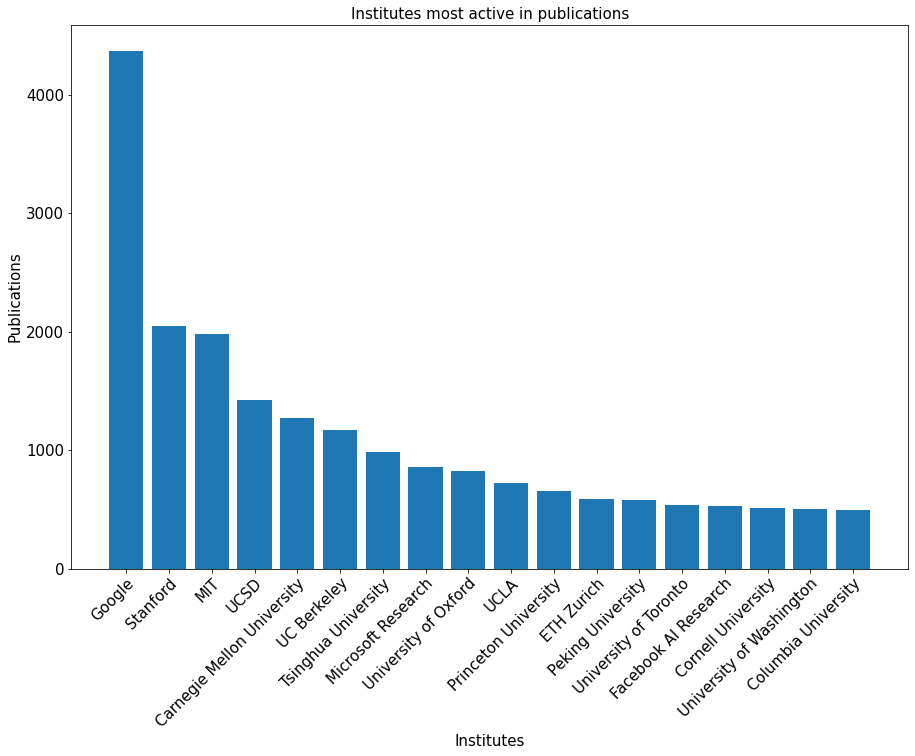

In [21]:
fig,ax = subplots(figsize=(15,10))
ax.bar(affil.keys(), affil.values())
ax.set_xlabel('Institutes', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor", fontsize = 15)
plt.setp(ax.get_yticklabels(),  fontsize = 15)
plt.title('Institutes most active in publications', fontsize = 15)

In [96]:
authors = np.asarray(df_whole['Authors'])

In [97]:
affil.values()

dict_values([3788, 1770, 1719, 1150, 1135, 1070, 899, 799, 775, 609, 571, 533, 504, 478, 472, 470, 469, 467, 463, 449])

In [98]:
author_dict = dict()
for row in authors: 
    row = str(row).split(', ')
    for entry in row: 
        if entry not in author_dict.keys():
            author_dict.update({entry:1})
        else: 
            author_dict[entry]+=1

In [99]:
author_dict = sorted(author_dict.items(), key = op.itemgetter(1))[::-1]

In [100]:
author_dict = dict(author_dict[:20])

Text(0.5, 1.0, 'Authors most active in publications')

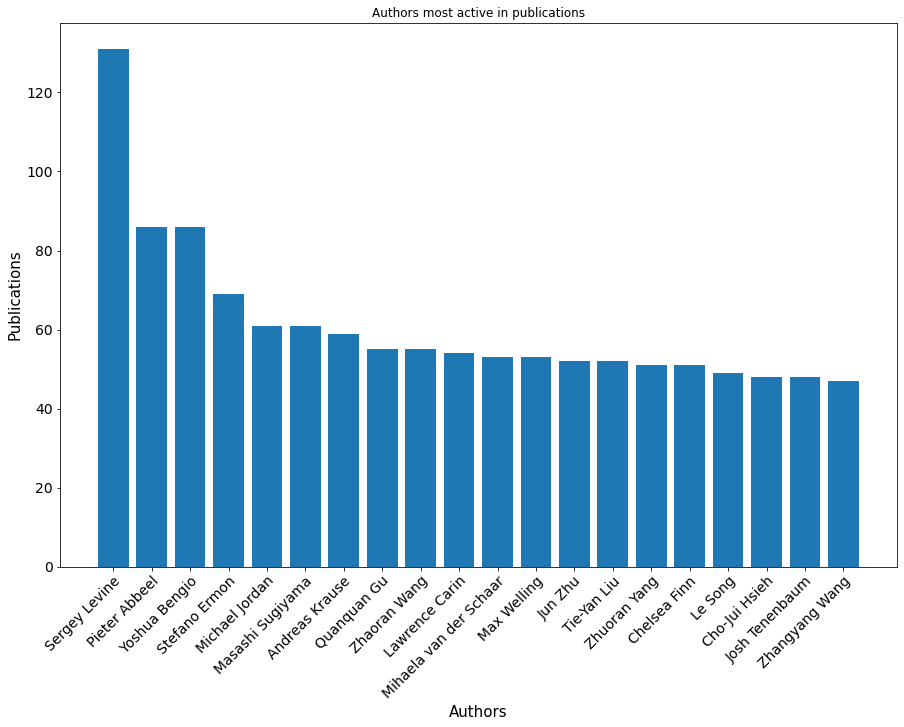

In [104]:
fig,ax = subplots(figsize = (15,10))
ax.bar(author_dict.keys(), author_dict.values())
ax.set_xlabel('Authors', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor",fontsize = 14)
plt.setp(ax.get_yticklabels(), fontsize = 14)
plt.title('Authors most active in publications')

#Try horizontal bar chart

In [102]:
affil_nips_2017 = np.asarray(df_nips[df_nips['YEAR']==2017]['Affiliations'])
affil_nips_2018 = np.asarray(df_nips[df_nips['YEAR']==2018]['Affiliations'])
affil_nips_2019 = np.asarray(df_nips[df_nips['YEAR']==2019]['Affiliations'])
affil_nips_2020 = np.asarray(df_nips[df_nips['YEAR']==2020]['Affiliations'])
affil_nips_2021 = np.asarray(df_nips[df_nips['YEAR']==2021]['Affiliations'])

affil_iclr_2017 = np.asarray(df_iclr[df_iclr['YEAR']==2017]['Affiliations'])
affil_iclr_2018 = np.asarray(df_iclr[df_iclr['YEAR']==2018]['Affiliations'])
affil_iclr_2019 = np.asarray(df_iclr[df_iclr['YEAR']==2019]['Affiliations'])
affil_iclr_2020 = np.asarray(df_iclr[df_iclr['YEAR']==2020]['Affiliations'])
affil_iclr_2021 = np.asarray(df_iclr[df_iclr['YEAR']==2021]['Affiliations'])

affil_icml_2017 = np.asarray(df_icml[df_icml['YEAR']==2017]['Affiliations'])
affil_icml_2018 = np.asarray(df_icml[df_icml['YEAR']==2018]['Affiliations'])
affil_icml_2019 = np.asarray(df_icml[df_icml['YEAR']==2019]['Affiliations'])
affil_icml_2020 = np.asarray(df_icml[df_icml['YEAR']==2020]['Affiliations'])
affil_icml_2021 = np.asarray(df_icml[df_icml['YEAR']==2021]['Affiliations'])

affil_cvpr_2017 = np.asarray(df_cvpr[df_cvpr['YEAR']==2017]['Affiliations'])
affil_cvpr_2018 = np.asarray(df_cvpr[df_cvpr['YEAR']==2018]['Affiliations'])
affil_cvpr_2019 = np.asarray(df_cvpr[df_cvpr['YEAR']==2019]['Affiliations'])
affil_cvpr_2020 = np.asarray(df_cvpr[df_cvpr['YEAR']==2020]['Affiliations'])
affil_cvpr_2021 = np.asarray(df_cvpr[df_cvpr['YEAR']==2021]['Affiliations'])


In [103]:
author_dict.values()


dict_values([131, 86, 86, 69, 61, 61, 59, 55, 55, 54, 53, 53, 52, 52, 51, 51, 49, 48, 48, 47])

In [23]:
nips = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}
icml = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}
iclr = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}
cvpr = {2017:[], 2018:[], 2019:[], 2020:[], 2021:[]}

affil_nips = {2017: affil_nips_2017, 2018: affil_nips_2018, 2019: affil_nips_2019, 2020: affil_nips_2020, 2021: affil_nips_2021}
affil_icml = {2017: affil_icml_2017, 2018: affil_icml_2018, 2019: affil_icml_2019, 2020: affil_icml_2020, 2021: affil_icml_2021}
affil_iclr = {2017: affil_iclr_2017, 2018: affil_iclr_2018, 2019: affil_iclr_2019, 2020: affil_iclr_2020,2021: affil_iclr_2021}
affil_cvpr = {2017: affil_cvpr_2017, 2018: affil_cvpr_2018, 2019: affil_cvpr_2019, 2020: affil_cvpr_2020, 2021: affil_cvpr_2021 }

affil = [affil_nips, affil_icml, affil_iclr, affil_cvpr]

# nips_2017,nips_2018,nips_2019,nips_2020 = [],[],[],[]
# iclr_2017,iclr_2018,iclr_2019,iclr_2021 = [],[],[],[]
# def get_names(arr, affil):
#     assert isinstance(arr, list)
#     for i in range(len(affil)): 
#         row = str(affil[i]).replace('[','').replace(']','').replace('\n',',').split(', ')
#         for entry in row:
#             arr.append(entry.lower().replace("'",'').replace("'",'').replace('"',''))
            
data = [nips, icml, iclr, cvpr]
years = range(2017,2022)

for i in range(len(data)): 
    for year in years:
        for k in range(len(affil[i][year])):
            row = str(affil[i][year][k]).replace('[','').replace(']','').replace('\n',',').split(', ')
            for entry in row:
                data[i][year].append(entry.lower().replace("'",'').replace("'",'').replace('"',''))
        
# get_names(nips_2017,affil_nips_2017)
# get_names(nips_2018,affil_nips_2018)
# get_names(nips_2019,affil_nips_2019)
# get_names(nips_2020,affil_nips_2020)
# get_names(iclr_2017, affil_iclr_2017)
# get_names(iclr_2018, affil_iclr_2018)
# get_names(iclr_2019, affil_iclr_2019)
# get_names(iclr_2021, affil_iclr_2021)

In [24]:
uni_keywords = ['uni','tech','uc','mit','ui','eth','epfl','inst','college']
industry_kewords = ['google','microsoft','adobe','amazon','deepmind','ai','research','systems','nvidia','amd']

In [25]:
nips_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
nips_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(nips_university.keys())
names = [nips[2017],nips[2018],nips[2019],nips[2020],nips[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            nips_university[year] +=1
        else: 
            nips_industry[year]+=1
            

            
icml_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
icml_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(icml_university.keys())
names = [icml[2017],icml[2018],icml[2019],icml[2020],icml[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            icml_university[year] +=1
        else:
            icml_industry[year]+=1
            

iclr_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
iclr_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(iclr_university.keys())
names = [iclr[2017],iclr[2018],iclr[2019],iclr[2020],iclr[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            iclr_university[year] +=1
        else:
            iclr_industry[year]+=1

cvpr_university = {2017:0, 2018:0,2019:0,2020:0,2021:0}
cvpr_industry = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(cvpr_university.keys())
names = [cvpr[2017],cvpr[2018],cvpr[2019],cvpr[2020],cvpr[2021]]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            cvpr_university[year] +=1
        else:
            cvpr_industry[year]+=1


In [26]:
nips_university

{2017: 1659, 2018: 2603, 2019: 3762, 2020: 5228, 2021: 7247}

In [27]:
nips_industry

{2017: 1003, 2018: 1528, 2019: 2229, 2020: 3138, 2021: 3744}

In [28]:
icml_university

{2017: 942, 2018: 1514, 2019: 1867, 2020: 2787, 2021: 3193}

In [29]:
icml_industry

{2017: 683, 2018: 920, 2019: 1191, 2020: 1716, 2021: 1966}

In [30]:
iclr_university

{2017: 237, 2018: 758, 2019: 1256, 2020: 326, 2021: 1302}

In [31]:
iclr_industry

{2017: 237, 2018: 760, 2019: 1042, 2020: 201, 2021: 950}

In [32]:
cvpr_university

{2017: 1804, 2018: 2460, 2019: 4068, 2020: 5898, 2021: 5861}

In [33]:
cvpr_industry

{2017: 1386, 2018: 1902, 2019: 1846, 2020: 2265, 2021: 2349}

In [34]:
total_university = dict()
total_industry = dict()
for key in list(cvpr_industry.keys()):
    total_university[key] = nips_university[key] + icml_university[key] + iclr_university[key] + cvpr_university[key]
    total_industry[key] = nips_industry[key] + icml_industry[key] + iclr_industry[key] + cvpr_industry[key]
 

Text(0.5, 1.0, 'Total Publications by university and industry for each year')

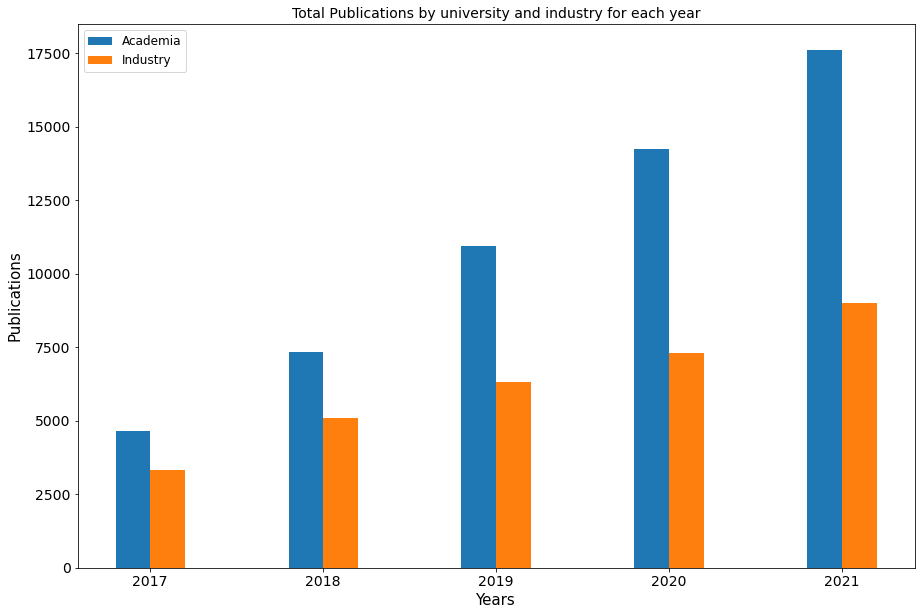

In [109]:
fig,axs = subplots(figsize = (15,10))
years = np.asarray(list(total_university.keys()))
bar_width = 0.2
axs.bar(years, total_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, total_industry.values(), width = bar_width, label = 'Industry')
axs.set_xlabel('Years', fontsize = 15)
axs.set_ylabel('Publications', fontsize = 15)
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
plt.setp(axs.get_yticklabels(),fontsize = 14)
plt.setp(axs.get_xticklabels(),fontsize = 14)
axs.set_xticklabels(years)
axs.legend(fontsize = 12)
axs.set_title('Total Publications by university and industry for each year', fontsize = 14)

In [36]:
'uni' in 'university of technology sydney'

True

Text(0.5, 1.0, 'Publications by university and industry in NeurIPS')

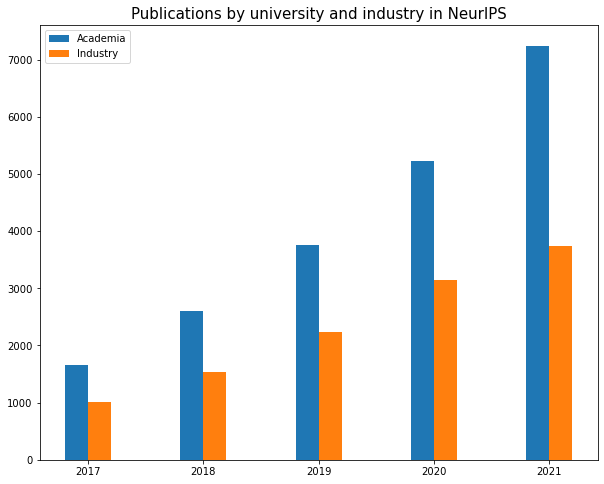

In [37]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_university.keys()))
bar_width = 0.2
axs.bar(years, nips_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, nips_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in NeurIPS', fontsize = 15)

Text(0.5, 1.0, 'Publications by university and industry in ICML')

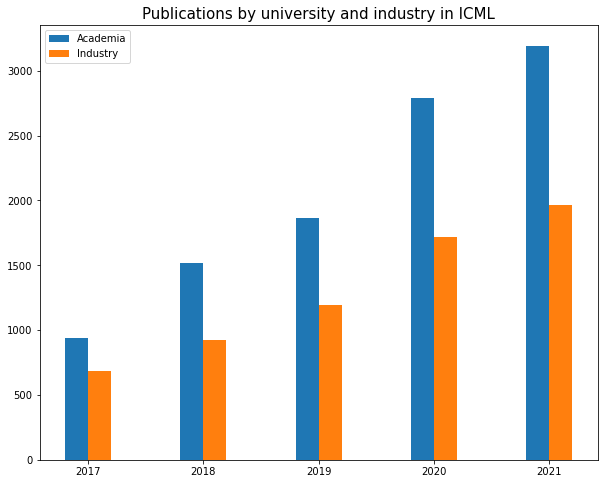

In [38]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(icml_university.keys()))
bar_width = 0.2
axs.bar(years, icml_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, icml_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in ICML', fontsize = 15)

Text(0.5, 1.0, 'Publications by university and industry in ICLR')

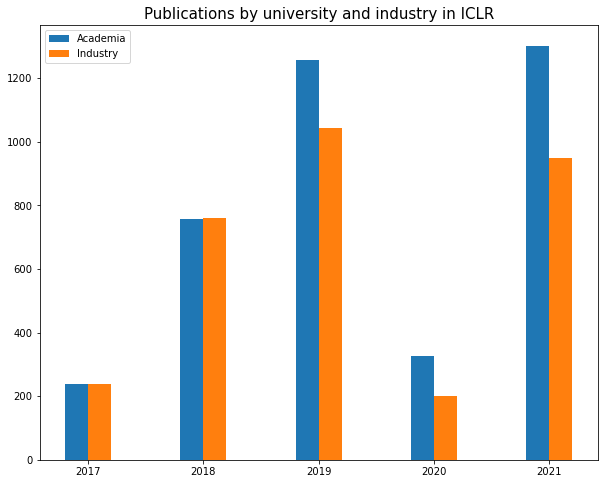

In [39]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(iclr_university.keys()))
bar_width = 0.2
axs.bar(years, iclr_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, iclr_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
# axs.spines['top'].set_visible(False)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in ICLR', fontsize = 15)

Text(0.5, 1.0, 'Publications by university and industry in CVPR')

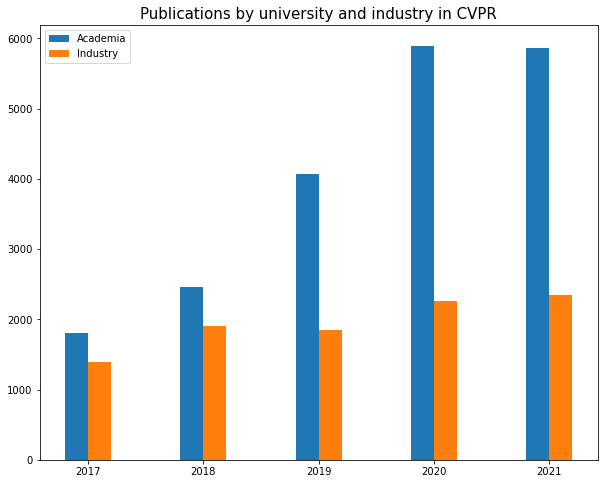

In [40]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(cvpr_university.keys()))
bar_width = 0.2
axs.bar(years, cvpr_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, cvpr_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
# axs.spines['top'].set_visible(False)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry in CVPR', fontsize = 15)

In [41]:
industry_kewords = ['google','microsoft','adobe','amazon','deepmind','ai','research','systems','nvidia','amd']

In [42]:
industry = pd.DataFrame(columns=['keywords'])
industry['keywords'] = industry_kewords

In [43]:
industry

,keywords
0,google
1,microsoft
2,adobe
3,amazon
4,deepmind
5,ai
6,research
7,systems
8,nvidia
9,amd


In [44]:
industry.to_csv(data_dir + 'industry_keywords.csv')

# Collaboration of UCSD with industry 

In [45]:
def get_affiliations(aff): 
    for i in range(len(aff)): 
        aff[i] = str(aff[i]).replace("'",'').replace("'",'').replace('"','').replace('"','').replace('[','').replace(']','').lower()
        

In [46]:
get_affiliations(affil_nips_2017)
get_affiliations(affil_nips_2018)
get_affiliations(affil_nips_2019)
get_affiliations(affil_nips_2020)
get_affiliations(affil_nips_2021)

get_affiliations(affil_icml_2017)
get_affiliations(affil_icml_2018)
get_affiliations(affil_icml_2019)
get_affiliations(affil_icml_2020)
get_affiliations(affil_icml_2021)

get_affiliations(affil_iclr_2017)
get_affiliations(affil_iclr_2018)
get_affiliations(affil_iclr_2019)
get_affiliations(affil_iclr_2020)
get_affiliations(affil_iclr_2021)

get_affiliations(affil_cvpr_2017)
get_affiliations(affil_cvpr_2018)
get_affiliations(affil_cvpr_2019)
get_affiliations(affil_cvpr_2020)
get_affiliations(affil_cvpr_2021)


In [47]:
affil_cvpr_2017


array(['univ. of minnesota  minneapolis  mn  usa, univ. of minnesota  minneapolis  mn  usa',
       'university of technology sydney  broadway  ultimo  nsw 2007  australia, cvpr unit  indian statistical institute  kolkata 700108  india, cvpr unit  indian statistical institute  kolkata 700108  india, cvpr unit  indian statistical institute  kolkata 700108  india, university of technology sydney  broadway  ultimo  nsw 2007  australia',
       'gonda multidiscipl. brain res. center  bar ilan univ.  ramat gan  israel, blavatnik sch. of comput. sci.  tel aviv univ.  tel-aviv  israel',
       'sch. of comput. sci. & software eng.  univ. of western australia  crawley  wa  australia, nat. univ. of sci. & technol.  islamabad  pakistan, sch. of comput. sci. & software eng.  univ. of western australia  crawley  wa  australia',
       'uc san diego  san diego  ca  usa, univ. of salzburg  salzburg  austria, unc chapel hill  chapel hill  nc  usa, uc san diego  san diego  ca  usa',
       'comput. vi

In [48]:
nips_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020,affil_nips_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            nips_collab[year]+=1

In [49]:
icml_collab = {2017:0, 2018:0,2019:0,2020:0, 2021:0}
years = list(icml_collab.keys())
names = [affil_icml_2017,affil_icml_2018,affil_icml_2019,affil_icml_2020,affil_icml_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            icml_collab[year]+=1

In [61]:
iclr_collab = {2017:0, 2018:0,2019:0,2020:0, 2021:0}
years = list(iclr_collab.keys())
names = [affil_iclr_2017,affil_iclr_2018,affil_iclr_2019,affil_iclr_2020,affil_iclr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            iclr_collab[year]+=1

In [62]:
cvpr_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(cvpr_collab.keys())
names = [affil_cvpr_2017,affil_cvpr_2018,affil_cvpr_2019,affil_cvpr_2020,affil_cvpr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            cvpr_collab[year]+=1

In [63]:
nips_collab

{2017: 215, 2018: 294, 2019: 449, 2020: 613, 2021: 764}

In [64]:
icml_collab

{2017: 104, 2018: 162, 2019: 238, 2020: 313, 2021: 363}

In [65]:
iclr_collab

{2017: 50, 2018: 144, 2019: 198, 2020: 44, 2021: 172}

In [66]:
cvpr_collab

{2017: 89, 2018: 153, 2019: 378, 2020: 596, 2021: 607}

Text(0.5, 1.0, 'Collaborations between university and industry in each year')

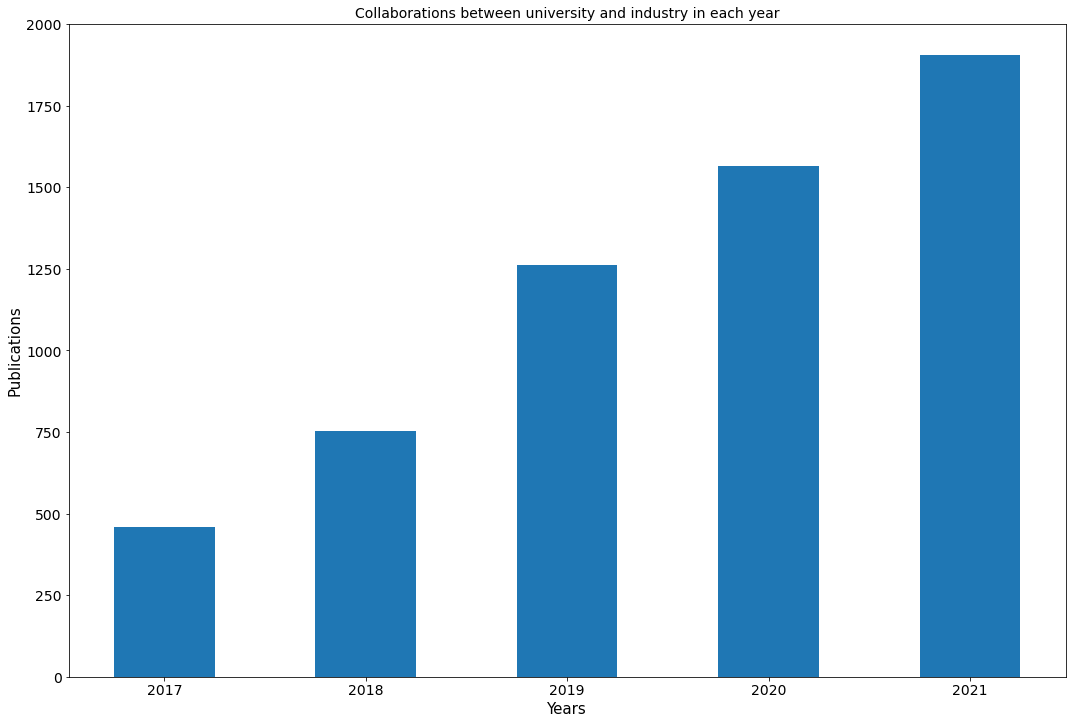

In [126]:
total_collab = dict()
for key in list(nips_collab.keys()):
    total_collab[key] = nips_collab[key] + icml_collab[key] + iclr_collab[key] + cvpr_collab[key]

fig,axs = subplots(figsize = (15,10))
years = np.asarray(list(total_collab.keys()))
bar_width = 0.5
axs.bar(years, total_collab.values(),linewidth = 0, width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.set_xlabel('Years', fontsize = 15)
axs.set_ylabel('Publications', fontsize = 15)
plt.setp(axs.get_yticklabels(),fontsize = 14)
plt.setp(axs.get_xticklabels(),fontsize = 14)
plt.tight_layout()
axs.set_title('Collaborations between university and industry in each year', fontsize = 14)    
    

Text(0.5, 1.0, 'Collaborations between university and industry in NeurIPS')

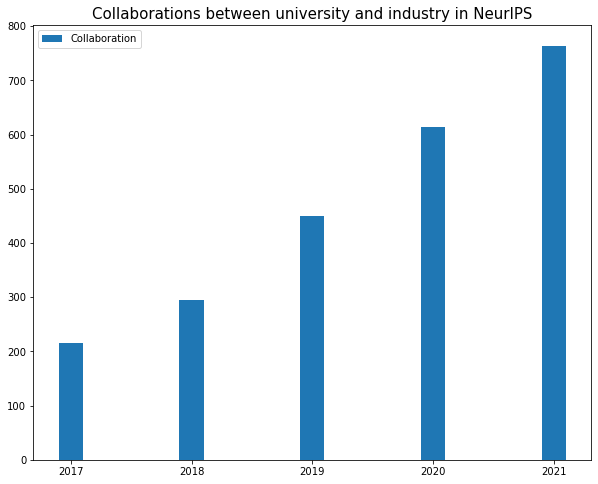

In [121]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_collab.keys()))
bar_width = 0.2
axs.bar(years, nips_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
plt.setp(axs.get_yticklabels(),fontsize = 14)
plt.setp(axs.get_xticklabels(),fontsize = 14)

axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in NeurIPS', fontsize = 15)

Text(0.5, 1.0, 'Collaborations between university and industry in ICML')

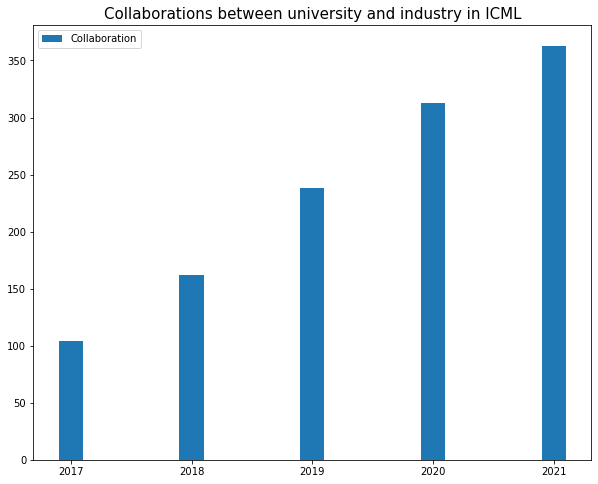

In [69]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(icml_collab.keys()))
bar_width = 0.2
axs.bar(years, icml_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in ICML', fontsize = 15)

Text(0.5, 1.0, 'Collaborations between university and industry in ICLR')

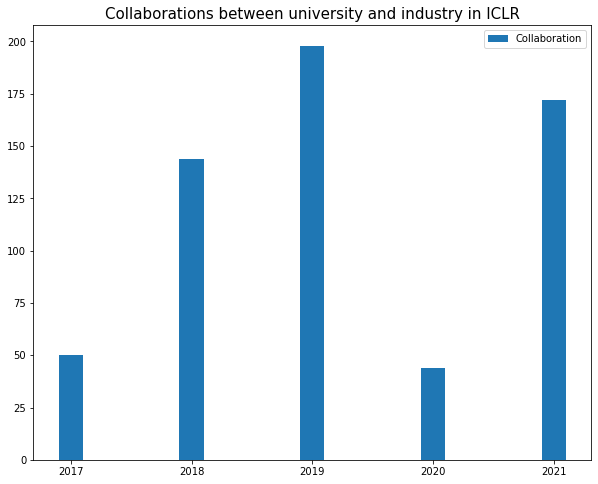

In [70]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(iclr_collab.keys()))
bar_width = 0.2
axs.bar(years, iclr_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry in ICLR', fontsize = 15)

In [71]:
ucsd_nips_collab = {2017:0, 2018:0,2019:0,2020:0}
ucsd_key = ['ucsd', 'uc san diego', 'university of california san diego',\
            'university of california at san diego','university of california, san diego','university of california']
years = list(ucsd_nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords): 
            ucsd_nips_collab[year]+=1

In [72]:
ucsd_nips_collab

{2017: 8, 2018: 6, 2019: 20, 2020: 23}

In [73]:
ucsd_key = ['ucsd', 'uc san diego', 'univerisity of california san diego',\
            'univerisity of california, san diego','univerisity of california']

In [74]:
ucsd_nips = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_nips.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020,affil_nips_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_nips[year]+=1

ucsd_icml = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_icml.keys())
names = [affil_icml_2017,affil_icml_2018,affil_icml_2019,affil_icml_2020,affil_icml_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_icml[year]+=1
            
ucsd_iclr = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_iclr.keys())
names = [affil_iclr_2017,affil_iclr_2018,affil_iclr_2019,affil_iclr_2020,affil_iclr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_iclr[year]+=1

ucsd_cvpr = {2017:0, 2018:0,2019:0,2020:0,2021:0}

years = list(ucsd_cvpr.keys())
names = [affil_cvpr_2017,affil_cvpr_2018,affil_cvpr_2019,affil_cvpr_2020,affil_cvpr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords) : 
            ucsd_cvpr[year]+=1
 


In [75]:
ucsd_iclr

{2017: 0, 2018: 0, 2019: 1, 2020: 1, 2021: 2}

In [76]:
ucsd_icml

{2017: 3, 2018: 0, 2019: 2, 2020: 2, 2021: 2}

In [77]:
ucsd_nips

{2017: 1, 2018: 1, 2019: 6, 2020: 7, 2021: 5}

In [84]:
ucsd_collab = {2017:0, 2018:0,2019:0,2020:0,2021:0}
years = list(ucsd_collab.keys())
for year in (years): 
    ucsd_collab[year] = ucsd_nips[year] + ucsd_icml[year] + ucsd_iclr[year] + ucsd_cvpr[year]

In [85]:
ucsd_collab

{2017: 6, 2018: 2, 2019: 13, 2020: 15, 2021: 19}

Text(0.5, 1.0, 'Collaborations between UCSD and Industries')

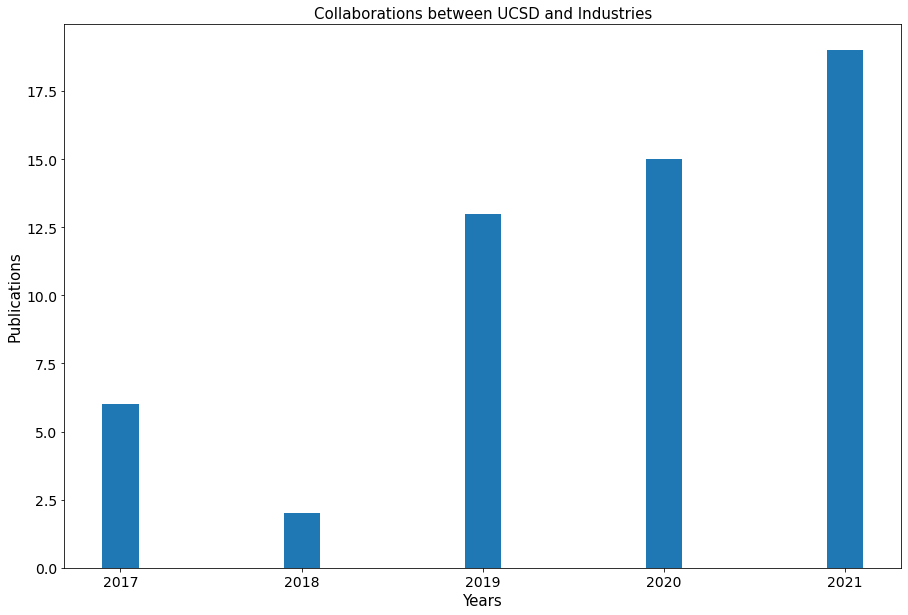

In [128]:
fig,axs = subplots(figsize = (15,10))
years = np.asarray(list(ucsd_collab.keys()))
bar_width = 0.2
axs.bar(years, ucsd_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.set_xlabel('Years', fontsize = 15)
axs.set_ylabel('Publications', fontsize = 15)

plt.setp(axs.get_yticklabels(),fontsize = 14)
plt.setp(axs.get_xticklabels(),fontsize = 14)
axs.set_title('Collaborations between UCSD and Industries', fontsize = 15)